In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import warnings

warnings.filterwarnings('ignore')

os.environ["OMP_NUM_THREADS"] = '1'

Завдання 1

In [2]:
def load_dataset(file_path, header=None):
    try:
        dataset = pd.read_csv(file_path, header=header)
        print("Датасет завантажено успішно.")
        return dataset
    except FileNotFoundError:
        print(f"Помилка: Файл {file_path} не знайдено.")
        return None
    except Exception as e:
        print(f"Помилка при завантаженні датасету: {str(e)}")
        return None

In [3]:
data_folder = 'data'
file_path = data_folder + '\\' + 'data_2d.csv'

ds_1 = load_dataset(file_path, header=None)

if ds_1 is not None:
    print("Перші рядки датасету:")
    print(ds_1.head())

Датасет завантажено успішно.
Перші рядки датасету:
     0         1         2
0  0.0 -0.768716  0.460860
1  0.0  2.687848  2.366961
2  0.0 -0.201379  0.470430
3  0.0  0.608496  1.225400
4  0.0 -0.082282  1.137218


In [5]:
X = ds_1.dropna()
X = X.values

scaler = StandardScaler()
X_scaled_1 = scaler.fit_transform(X)
print(X_scaled_1[:5])

[[-1.         -2.04352628 -1.09335983]
 [-1.          0.75105098  0.09709163]
 [-1.         -1.58484322 -1.08738314]
 [-1.         -0.93007208 -0.61586796]
 [-1.         -1.48855482 -0.67094181]]


In [6]:
def find_optimal_k(data, max_k=10):
    sse = [] 
    for k in range(1, max_k + 1):
        kmeans = KMeans(n_clusters=k, random_state=42, n_init=15)
        kmeans.fit(data)
        sse.append(kmeans.inertia_)

    plt.figure(figsize=(8, 6))
    plt.plot(range(1, max_k + 1), sse, marker='o')
    plt.title('Метод ліктя для визначення оптимальної кількості кластерів')
    plt.xlabel('Кількість кластерів')
    plt.ylabel('SSE (Сума квадратів відстаней)')
    plt.show()

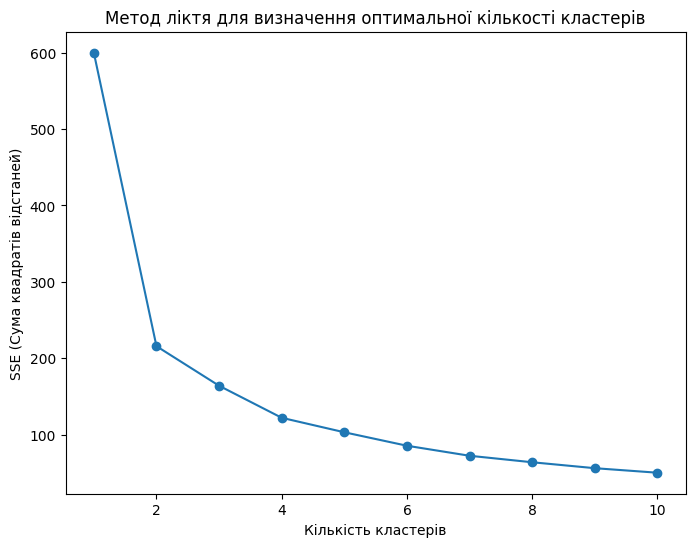

In [7]:
find_optimal_k(X_scaled_1)

2 опитмальна кількість кластерів

Завдання 2

In [8]:
def visual_clustering(ds, i, k, X_scaled):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=15)
    ds['Cluster'] = kmeans.fit_predict(X_scaled)

    plt.figure(figsize=(10, 6))

    plt.scatter(ds.iloc[:, i], ds.iloc[:, i+1], c=ds['Cluster'], cmap='viridis', edgecolors='k', s=50)
    plt.title('Результати кластеризації')
    plt.xlabel('Характеристика 1')
    plt.ylabel('Характеристика 2')
    plt.show()

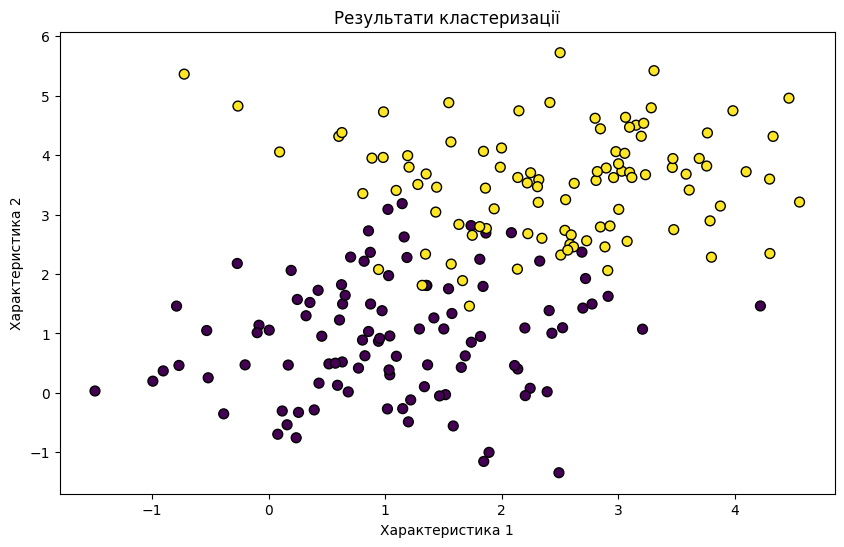

In [9]:
k = 2
visual_clustering(ds_1, 1, k, X_scaled_1)

In [11]:
file_path = data_folder + '\\' + 'mnist.csv'

ds_2 = load_dataset(file_path, header=None)

if ds_2 is not None:
    print("Перші рядки датасету:")
    print(ds_2.head())

Датасет завантажено успішно.
Перші рядки датасету:
   0    1    2    3    4    5    6    7    8    9    ...  775  776  777  778  \
0    7    0    0    0    0    0    0    0    0    0  ...    0    0    0    0   
1    2    0    0    0    0    0    0    0    0    0  ...    0    0    0    0   
2    1    0    0    0    0    0    0    0    0    0  ...    0    0    0    0   
3    0    0    0    0    0    0    0    0    0    0  ...    0    0    0    0   
4    4    0    0    0    0    0    0    0    0    0  ...    0    0    0    0   

   779  780  781  782  783  784  
0    0    0    0    0    0    0  
1    0    0    0    0    0    0  
2    0    0    0    0    0    0  
3    0    0    0    0    0    0  
4    0    0    0    0    0    0  

[5 rows x 785 columns]


In [12]:
X2 = ds_2.dropna()
X2 = X2.values

X_scaled_2 = scaler.fit_transform(X2)

# Застосування PCA для зменшення розмірності до 2
pca = PCA(n_components=2)
ds_2_pca = pca.fit_transform(X_scaled_2)

ds_2_pca_df = pd.DataFrame(data=ds_2_pca)

print(ds_2_pca[:5])

[[ -4.5285204    4.1970434 ]
 [  5.0254231  -12.4711493 ]
 [ -6.90749196  -5.88994359]
 [  8.58408752  -0.33870362]
 [  1.10581463   6.57815874]]


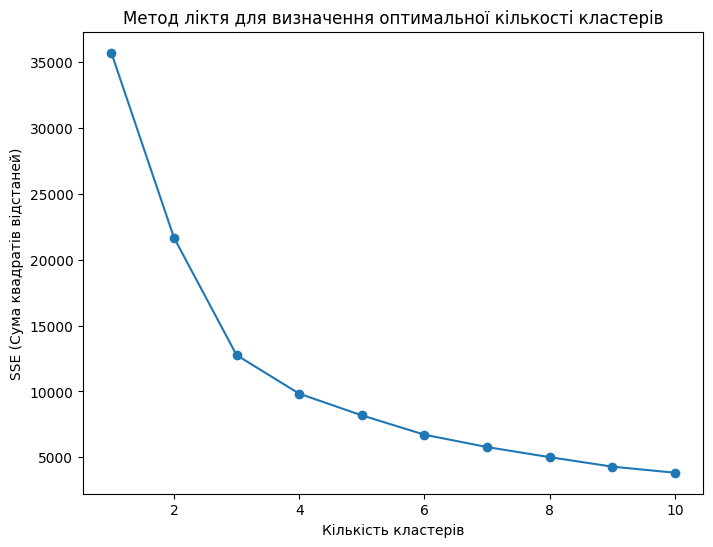

In [13]:
find_optimal_k(ds_2_pca)

3 оптимальна кількість кластерів

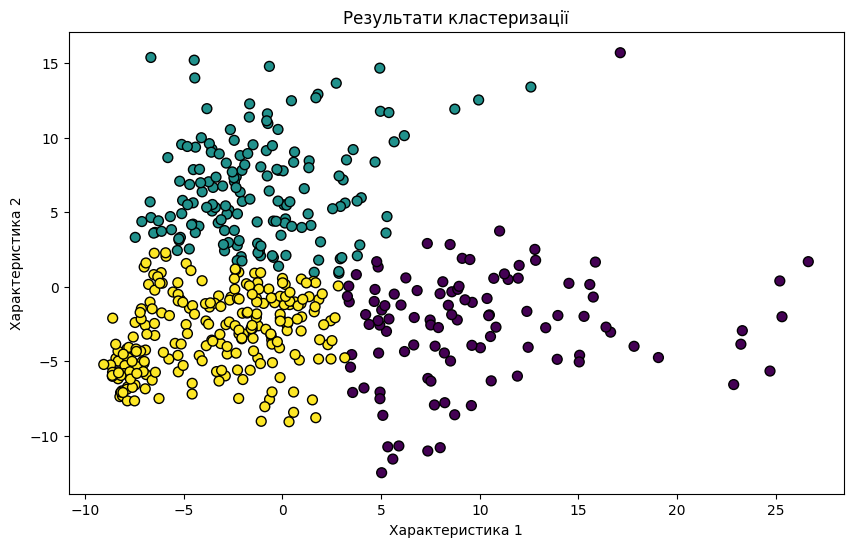

In [14]:
k = 3
visual_clustering(ds_2_pca_df, 0, k, ds_2_pca)